<br />
<div style="text-align: center;">
    <span style="font-weight: bold; color:#6dc; font-family: 'Arial Narrow'; font-size: 3.5em;">Sea Level Trends (NOAA and PSMLS)<br /></span>
</div>
<br />

<br />
<span style="color:#444; font-family: 'Arial'; font-size: 1.3em;"> We have to scrap the web...</span>
<br />

sea Level Anomalies: Índice de /allData/merged_alt/L4/cdr_grid_interim

In [3]:
from bs4 import BeautifulSoup
import pandas as pd
from netCDF4 import Dataset, num2date
import time, calendar, datetime, numpy
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import urllib, os

from six.moves import urllib
pd.set_option('display.max_row', None)
pd.set_option('display.max_columns', None)

In [4]:
# url that we are scraping
url = "http://www.sealevel.info/MSL_global_trendtable5_AB.html"

# this is the html from the given url
html = urllib.request.urlopen(url)


In [5]:
soup = BeautifulSoup(html)
type(soup)

/Users/vizzuality/anaconda/lib/python2.7/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 174 of the file /Users/vizzuality/anaconda/lib/python2.7/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


bs4.BeautifulSoup

In [6]:
soup.findAll('tr', limit=1)

[<tr>\n<td border="0" class="xl24" colspan="38" height="32" style="font-size:18.0pt" x:str=""><a href="MSL_global_trendtable5_AB.html" target="_top">NOAA's 2016 list of 375 long term trend tide stations, sorted by number of years</a></td>\n</tr>]

In [7]:
soup.findAll('tr', limit=3)[2]

<tr height="34" style="height:25.4pt;">\n<td class="xl26" height="34" style="border-top:none;border-bottom-width:medium;height:25.4pt" x:str=""><a href="MSL_global_trendtable5_A.html">coast-stn</a></td>\n<td class="xl26" style="border-top:none;border-bottom-width:medium" x:str=""><a href="MSL_global_trendtable5_B.html">NOAA stn</a></td>\n<td class="xl25" style="border-top:none;border-bottom-width:medium" x:str=""><a href="MSL_global_trendtable5_C.html">PSMSL\xa0stn</a></td>\n<td class="xl27" style="border-top:none;border-bottom-width:medium" x:str=""><a href="MSL_global_trendtable5_D.html">Location (click for trend &amp; analysis)</a></td>\n<td class="xl25" style="border-top:none;border-bottom-width:medium" x:str=""><a href="MSL_global_trendtable5_E.html">Start</a></td>\n<td class="xl25" style="border-top:none;border-bottom-width:medium" x:str=""><a href="MSL_global_trendtable5_F.html">End</a></td>\n<td class="xl25" style="border-top:none;border-bottom-width:medium" x:str=""><a href="M

In [8]:
column_headers = [th.getText() for th in 
                  soup.findAll('tr')[2].findAll('td')]

In [9]:
column_headers # our column headers

[u'coast-stn',
 u'NOAA stn',
 u'PSMSL\xa0stn',
 u'Location (click for trend & analysis)',
 u'Start',
 u'End',
 u'Range',
 u'Trend',
 u'\xb195%\u2009CI(trend)',
 u'Accel',
 u'\xb195%\u2009CI(accel)',
 u'lat',
 u'lon',
 u'data',
 u'first',
 u'last',
 u'lat',
 u'lon',
 u'info',
 u'data',
 u'first',
 u'last',
 u'Instl date',
 u'Start',
 u'End',
 u'Range',
 u'Trend',
 u'\xb195%\u2009CI(trend)',
 u'check',
 u'VM2 \r\n    past',
 u'VM2 \r\n    now',
 u'VM4 \r\n    past',
 u'VM4 \r\n    now',
 u'mid- \r\n    range',
 u'VM2 \r\n    adj',
 u'trend\xa0- \r\n    VM2']

In [10]:
data_rows = soup.findAll('tr')[3:]

In [11]:
type(data_rows)

list

In [12]:
player_data = [[td.getText() for td in data_rows[i].findAll('td')]
            for i in range(len(data_rows))]

In [13]:
df = pd.DataFrame(player_data)

In [14]:
df.head()  # head() lets us see the 1st 5 rows of our DataFrame by default

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
0,701-001,1630000,540,"Apra Harbor, Guam, Marianas Islands, USA",1948.04,2016.87,68.91,1.76,1.30,0.1765,0.1362,13.4383,144.6533,raw,1948-01,2015-12,13.4387,144.6539,info,bm,raw,adj,1948-01,2016-12,03/11/1948,1993,2015,23,4.55,4.68,updated,-0.39,-0.32,-0.36,-0.28,2004.0,-0.330,4.880
1,821-002,9497645,1857,"Prudhoe Bay, AK, USA",1988.96,2016.87,27.99,1.52,1.81,0.3179,0.4926,70.4000,-148.5267,raw,1994-10,2014-12,70.4000,-148.5270,info,bm,raw,adj,1988-09,2016-11,05/01/1989,1990,2014,25,1.20,1.99,updated,0.76,0.77,-0.30,-0.28,2002.0,0.768,0.432
2,821-019,9454240,1353,"Valdez, AK, USA",1973.37,2016.79,43.50,-5.04,1.02,-0.4816,0.1709,61.1250,-146.3617,raw,1973-05,2015-12,61.1250,-146.3620,info,bm,raw,adj,1973-05,2016-11,08/15/1964,1988,2015,28,-8.60,1.50,updated,-0.49,-0.45,-0.98,-0.94,2001.5,-0.458,-8.142
3,821-020,9454050,566,"Cordova, AK, USA",1964.37,2016.79,52.50,3.81,0.74,-0.3682,0.0978,60.5583,-145.7517,raw,1964-05,2015-12,60.5583,-145.7530,info,bm,raw,adj,1964-05,2016-11,05/14/1949,1988,2015,28,-0.04,1.36,updated,-0.36,-0.32,-0.88,-0.84,2001.5,-0.328,0.288
4,821-026,9453220,445,"Yakutat, Yakutat Bay, AK, USA",1940.04,2016.87,76.91,-7.84,0.50,-0.2096,0.0444,59.5483,-139.7333,raw,1940-01,2015-12,59.5485,-139.7334,info,bm,raw,adj,1940-05,2016-12,04/24/1940,1988,2015,28,-14.10,1.50,updated,-0.63,-0.60,-1.14,-1.10,2001.5,-0.606,-13.494


In [15]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
372,170-101,170-101,3,"Sheerness, UK",1832.29,2015.46,183.25,1.66,0.10,0.0174,0.0037,51.4456,0.7434,raw,1832-04,2015-06,,,,,,adj,,,,1832,2009,178,1.66,0.10,,-0.05,-0.06,-0.12,-0.13,1920.5,-0.050,1.710
373,110-092,110-092,2,"Swinoujscie, Poland",1811.04,1999.96,189.00,0.80,0.12,0.0106,0.0049,53.9167,14.2333,raw,1811-01,1999-12,,,,,,adj,,,,1811,1999,189,0.80,0.12,,-0.37,-0.36,-0.01,-0.01,1905.0,-0.370,1.170
374,190-091,190-091,1,"Brest, France",1807.04,2015.96,209.00,1.08,0.08,0.0100,0.0027,48.3828,-4.4948,raw,1807-01,2015-12,,,,,,adj,,,,1807,2011,205,1.05,0.08,,0.31,0.30,0.18,0.17,1909.0,0.310,0.740
375,,,Averages:,,1941.00,2011.92,71.00,1.560,0.762,0.0524,0.1209,,,,,,,,,,,,,,,1941.6,2008.3,67.7,1.298,0.716,,-0.381,-0.351,-0.360,-0.330,1974.0,-0.370,1.589
376,,,Medians:,,,,,1.762,,0.0175,,,,,,,,,,,,,,,,,,,1.710,,,,,,,,,1.602


In [16]:
data = df[:-2]

In [17]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
0,701-001,1630000,540,"Apra Harbor, Guam, Marianas Islands, USA",1948.04,2016.87,68.91,1.76,1.30,0.1765,0.1362,13.4383,144.6533,raw,1948-01,2015-12,13.4387,144.6539,info,bm,raw,adj,1948-01,2016-12,03/11/1948,1993,2015,23,4.55,4.68,updated,-0.39,-0.32,-0.36,-0.28,2004.0,-0.330,4.880
1,821-002,9497645,1857,"Prudhoe Bay, AK, USA",1988.96,2016.87,27.99,1.52,1.81,0.3179,0.4926,70.4000,-148.5267,raw,1994-10,2014-12,70.4000,-148.5270,info,bm,raw,adj,1988-09,2016-11,05/01/1989,1990,2014,25,1.20,1.99,updated,0.76,0.77,-0.30,-0.28,2002.0,0.768,0.432
2,821-019,9454240,1353,"Valdez, AK, USA",1973.37,2016.79,43.50,-5.04,1.02,-0.4816,0.1709,61.1250,-146.3617,raw,1973-05,2015-12,61.1250,-146.3620,info,bm,raw,adj,1973-05,2016-11,08/15/1964,1988,2015,28,-8.60,1.50,updated,-0.49,-0.45,-0.98,-0.94,2001.5,-0.458,-8.142
3,821-020,9454050,566,"Cordova, AK, USA",1964.37,2016.79,52.50,3.81,0.74,-0.3682,0.0978,60.5583,-145.7517,raw,1964-05,2015-12,60.5583,-145.7530,info,bm,raw,adj,1964-05,2016-11,05/14/1949,1988,2015,28,-0.04,1.36,updated,-0.36,-0.32,-0.88,-0.84,2001.5,-0.328,0.288
4,821-026,9453220,445,"Yakutat, Yakutat Bay, AK, USA",1940.04,2016.87,76.91,-7.84,0.50,-0.2096,0.0444,59.5483,-139.7333,raw,1940-01,2015-12,59.5485,-139.7334,info,bm,raw,adj,1940-05,2016-12,04/24/1940,1988,2015,28,-14.10,1.50,updated,-0.63,-0.60,-1.14,-1.10,2001.5,-0.606,-13.494


In [18]:
dataframe = data[[0,1,3,float(11),float(12),22,23,24,25,26,27,28,29]]

In [19]:
type(dataframe)

pandas.core.frame.DataFrame

In [20]:
columns = ['coast-stn', 'noaa_stn', 'location', 'lat', 'lon', 'first', 'last', 'Instl_date', 'Start', 'End', 'Range', 'Trend', '95% CI trend']

In [21]:
dataframe.columns = columns

In [22]:
dataframe['lat'] = dataframe['lat'].apply(pd.to_numeric, errors='coerce') 
dataframe['lon'] = dataframe['lon'].apply(pd.to_numeric, errors='coerce') 
dataframe['Trend'] = dataframe['Trend'].apply(pd.to_numeric, errors='coerce') 
dataframe['95%\xe2\x80\x89CI trend'] = dataframe['95%\xe2\x80\x89CI trend'].apply(pd.to_numeric, errors='coerce') 
#dataframe['lat2'] = dataframe['lat2'].apply(pd.to_numeric, errors='coerce') 
#dataframe['lon2'] = dataframe['lon2'].apply(pd.to_numeric, errors='coerce') 
dataframe

/Users/vizzuality/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/vizzuality/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/vizzuality/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


,coast-stn,noaa_stn,location,lat,lon,first,last,Instl_date,Start,End,Range,Trend,95% CI trend
0,701-001,1630000,"Apra Harbor, Guam, Marianas Islands, USA",13.4383,144.6533,1948-01,2016-12,03/11/1948,1993,2015,23,4.55,4.68
1,821-002,9497645,"Prudhoe Bay, AK, USA",70.4000,-148.5267,1988-09,2016-11,05/01/1989,1990,2014,25,1.20,1.99
2,821-019,9454240,"Valdez, AK, USA",61.1250,-146.3617,1973-05,2016-11,08/15/1964,1988,2015,28,-8.60,1.50
3,821-020,9454050,"Cordova, AK, USA",60.5583,-145.7517,1964-05,2016-11,05/14/1949,1988,2015,28,-0.04,1.36
4,821-026,9453220,"Yakutat, Yakutat Bay, AK, USA",59.5483,-139.7333,1940-05,2016-12,04/24/1940,1988,2015,28,-14.10,1.50
5,823-044,9411270,"Rincon Island, Pacific Ocean, CA, USA",34.3483,-119.4417,1962-01,1990-10,03/08/1962,1962,1990,29,3.22,1.66
6,830-071,830-071,"Manzanillo, Mexico",19.0500,-104.3333,,,,1954,1982,29,3.18,2.17
7,842-011,842-011,"Buenaventura, Colombia",3.9000,-77.1000,,,,1941,1969,29,0.96,1.22
8,,8573364,"Tolchester Beach, MD, USA",NaN,NaN,1983-07,2016-12,06/24/1971,1986,2014,29,4.25,1.51
9,360-001,360-001,"Ponta Delgada, Portugal",37.7356,-25.6714,,,,1978,2007,30,2.58,1.01


In [23]:
dataframe['Trend'].min()

-17.59

In [24]:
# Create empty lists for the data we are interested in.
lats, lons = dataframe['lat'].tolist(), dataframe['lon'].tolist()
magnitudes = dataframe['Trend'].tolist()

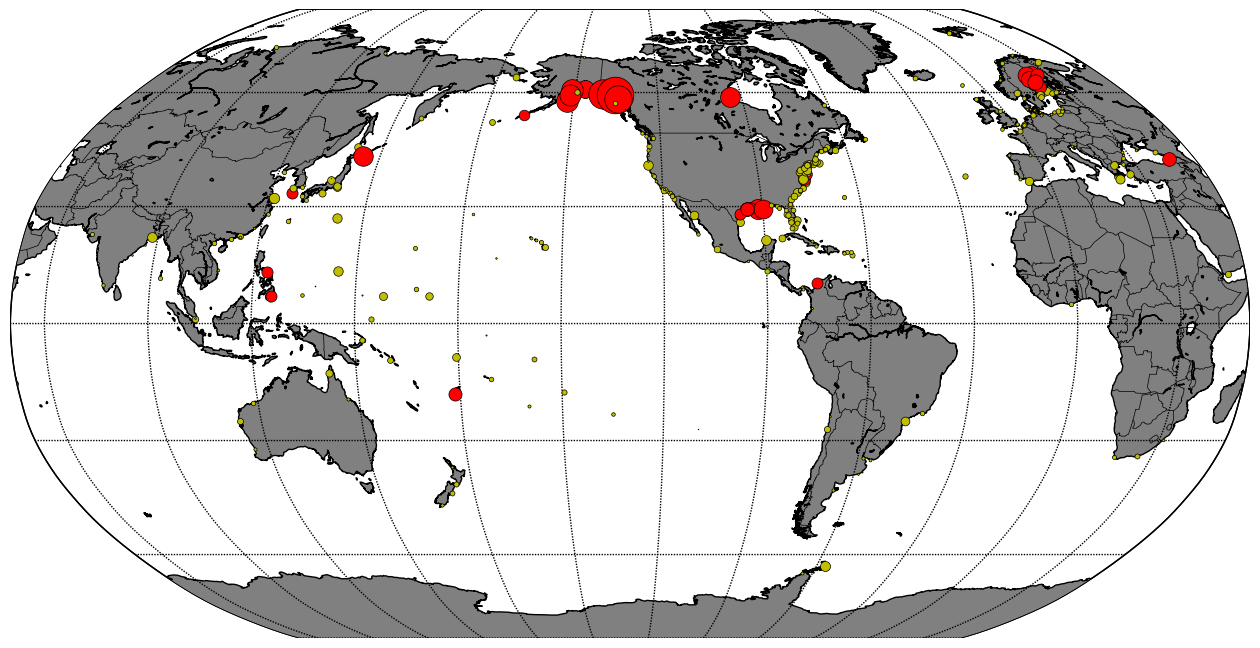

In [27]:
# --- Build Map ---
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

def get_marker_color(magnitude):
    # Returns green for small earthquakes, yellow for moderate
    #  earthquakes, and red for significant earthquakes.
    if (magnitude < -5 or magnitude > 5 ):
        return ('ro')
    elif (magnitude > -5 or magnitude < 5 ):
        return ('yo')
    else:
        return ('go')

# Make this plot larger.
plt.figure(figsize=(16,12))

eq_map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
              lat_0=0, lon_0=-130)
eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'gray')
eq_map.drawmapboundary()
eq_map.drawmeridians(np.arange(0, 360, 30))
eq_map.drawparallels(np.arange(-90, 90, 30))
 
min_marker_size = 1.5
for lon, lat, mag in zip(lons, lats, magnitudes):
    x,y = eq_map(lon, lat)
    msize = mag * min_marker_size
    marker_string = get_marker_color(mag)
    eq_map.plot(x, y, marker_string, markersize=msize)

plt.show()

In [30]:
import sys;
reload(sys);
sys.setdefaultencoding("utf8")

In [27]:
outFile='sea_level_trends.csv'
dataframe.to_csv(outFile)

In [ ]:
# Push to Amazon S3 instance
conn = tinys3.Connection(os.getenv('S3_ACCESS_KEY'),os.getenv('S3_SECRET_KEY'),tls=True)
f = open(outFile,'rb')
conn.upload(outFile,f,os.getenv('BUCKET'))

print 'ready' 